# Optimazation of GD

**`Author : Alhasan Gamal Mahmoud`**

**`Date   : 21 - 02 - 2022`**

**In this Script, I will develop a Python program that is able to implement the accelerated gradient descent methods (Momentum and NAG) in order to achieve the linear regression of a set of datapoints.**


## Better optimization Vs. Gradient Descent

The error surface contains more sloppy as well less sloppy areas. During back-propagation, there will be more updates in parameters for the regions with more slope whereas less updates in parameters for the regions with a gentle slope. More change in parameters leads to more change in loss, similarly less change in parameters leads to less change in the loss.

If the parameter initialization lands in a gentle slope area then it requires a large number of epochs to navigate through these areas. It happens so because the gradient will be very small in gentle slope regions. So it moves with small baby steps in gentle regions.

Consider a case with initialization in a flat surface as shown below where GD is used and the error is not reducing when the gradient is in the flat surface.

<img src="1_5C6RvLtqXlOcK5lJboezWg.gif">

Even after a large number of epochs for e.g. 10000 the algorithm is not converging.

Due to this issue, the convergence is not achieved so easily and the learning takes too much time.

To overcome this problem Momentum based gradient descent is used.


### Momentum-based gradient descent
Consider a case wherein in order to reach your desired destination you are continuously being asked to follow the same direction and once you become confident that you are following the right direction then you start taking bigger steps and you keep getting momentum in that same direction.

Momentum-based gradient descent update rule for weight parameter

\begin{equation}
\theta_t = \theta_{t-1} - v_t
\end{equation}

\begin{equation}
v_t = \gamma v_{t-1} + \alpha \delta (\theta_t)
\end{equation}

Gamma parameter($\gamma$) is the momentum term that indicates how much acceleration you want takes values between 0 and 1.

<img src="1_MxPOjaJDWZeE2zNUZxpdNQ.gif">

This algorithm adds momentum in the direction of consistent gradients and cancels the momentum if the gradients are in different directions.

**Issues with momentum based Gradient descent**

In the valley that leads to the exact desired minima, there are a large number of oscillations using momentum-based GD. Because it overshoots the minima with larger steps and takes a U-turn but again overshoots so this process repeats. This means moving with larger steps is not always good.

<img src="1_nBI9KeSoepPGNNf25ANaJg.gif">




In [101]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])

In [102]:
# creat random X and y
X = 2 * np.random.rand(100,1)
y = 4 +3 * X + np.random.randn(100,1)
theta = np.array([[4],[3]])

In [103]:
# display shapes of X, y, theta

print(f"X.shape = {X.shape}")
print(f"y.shape = {y.shape}")
print(f"theta.shape = {theta.shape}")

X.shape = (100, 1)
y.shape = (100, 1)
theta.shape = (2, 1)


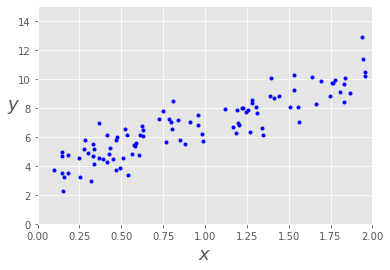

In [104]:
# draw data

plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [105]:
# cost function
def ComputeCost(X,y,theta):
    z = np.power(((X * theta.T) - y),2)
    return np.sum(z) / (2 * len(X))

In [106]:
# get gradient
def GetGradient(X,y,theta):
    pre = X @ theta
    grad = X.T @ (pre - y)
    return grad

In [107]:
# update v_t
def Update_V(X,y,theta,v,gamma,alpha):
    if len(v) == 0:
        v.append(np.array([[0],[0]]))
        return v
    v.append((gamma * v[-1]) + (alpha * GetGradient(X,y,theta)))
    
    return v

In [108]:
# Momentum GD
def momentum_GD(X,y,theta,alpha,gamma,Epoches):
    temp = np.zeros(theta.shape)
    cost = []                      
    thetas =[]   
    h = []
    v = []                                                                                                                                                                                                 
    for i in range(Epoches):
        h.append(X @ theta)
        
        v_t = Update_V(X,y,theta,v,gamma,alpha)
        temp = theta - v_t[-1]
        theta = temp
        thetas.append(theta)
        cost.append(ComputeCost(X,y,theta))
        if i > 0:
            if np.abs(cost[i-1] - cost[i]) < 0.00001:
                break
    return theta ,cost,thetas,h,v_t
    

In [109]:
alpha=0.001
itera=100
gama=0.5

In [110]:
# perform Momentum gradient desent to fit the model parameters
X_b = np.c_[np.ones((len(X),1)),X]
new_theta,cost,thetas,h,v_t = momentum_GD(X_b,y,theta,alpha,gamma,itera)
thetas = np.array(thetas).reshape(len(cost),2)

In [111]:
# Predict y values using the LR equation 
f = X_b @ new_theta

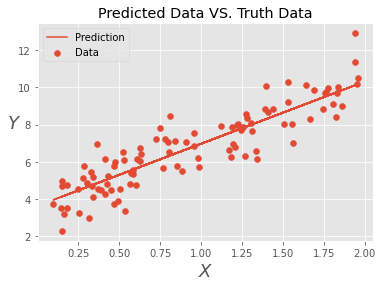

In [112]:
# Plot LR equation output (fitted line) with the original data (scatter plot of X,y)

plt.plot(X_b[:,1],f,label='Prediction')

plt.scatter(X,y,label='Data')

plt.legend()

plt.xlabel("$X$",fontsize=18)

plt.ylabel("$Y$",rotation=0,fontsize=18)

plt.title("Predicted Data VS. Truth Data")

plt.show()

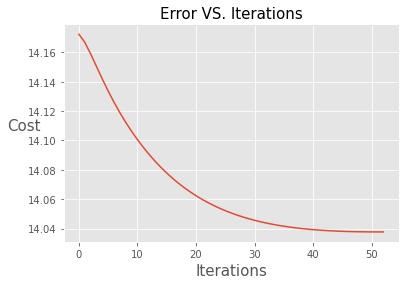

In [113]:
# draw Error Graph
plt.plot(cost)
plt.xlabel("Iterations",fontsize=15)
plt.ylabel("Cost",rotation=0,fontsize=15)
plt.title("Error VS. Iterations",fontsize=15)
plt.show()

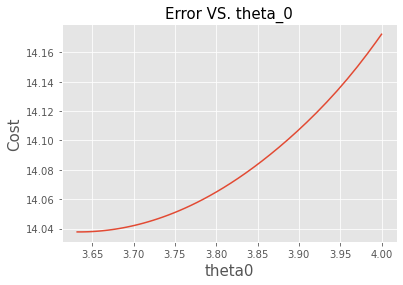

In [114]:
# draw Error and theta0 graph 
plt.plot(thetas[:,0],cost)
plt.xlabel("theta0",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_0",fontsize=15)
plt.show()

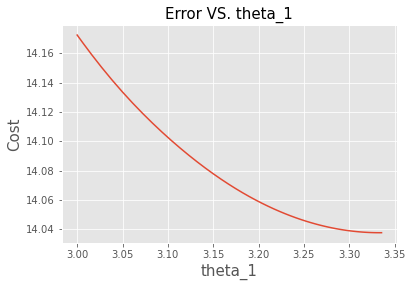

In [115]:
# draw Error and theta1 graph 
plt.plot(thetas[:,1],cost)
plt.xlabel("theta_1",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_1",fontsize=15)
plt.show()

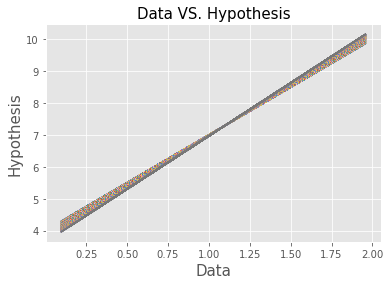

In [116]:
# draw Error and Hypothesis graph 
for i in  h:
    plt.plot(X,i)

plt.xlabel("Data",fontsize=15)
plt.ylabel("Hypothesis",fontsize=15)
plt.title("Data VS. Hypothesis",fontsize=15)
plt.show()

In [117]:
from sklearn.metrics import r2_score

r2_score(y,f)

0.7990677960659219

### Nesterov accelerated Gradient Descent (NAG)
In momentum based GD as the gradient heads to the valley(minima region), it makes a lot of U-turns(oscillations) before it converges. This problem was initially identified and responded by a researcher named Yurii Nesterov.

He suggested, make the movement first by history amount(previous momentum) then calculate the temporary gradient at this point and then update the parameters. In other words, before making an update directly first it looks ahead by moving with the previous momentum then it finds what the gradient should be.

This looking ahead helps NAG in finishing its job(finding the minima) quicker than momentum-based GD. Hence the oscillations are less compared to momentum based GD and also there are fewer chances of missing the minima.

<img src="1_aWTX8EOu10OkJzRzaR2P2A.png">
<img src="1_SV3x2pD4lOGvaWmyMiSgPQ.png">
<img src="1_5G4Adw4fy70IzVOuCjfu5w.gif">

In [18]:
# creat random X and y
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)
theta = np.array([[4],[3]])

In [19]:
# cost function
def ComputeCost(X,y,theta):
    z = np.power(((X * theta.T) - y),2)
    return np.sum(z) / (2 * len(X))

In [20]:
# get gradient
def GetGradient(X,y,theta):
    pre = X @ theta
    grad = X.T @ (pre - y)
    return grad

In [21]:
# update NAGv_t
def UpdateNAG_vt(X,y,theta,v,gamma,alpha):
    if len(v) == 0:
        v.append(np.array([[0],[0]]))
        new_theta = np.array([[0],[0]])
        return new_theta,v
    theta_temp = theta - gamma * v[-1]
    w_gred = alpha * GetGradient(X,y,theta_temp)
    new_theta = theta_temp - w_gred
    v.append(gamma * v[-1] +w_gred)
    
    return new_theta,v

In [22]:
# NAG_GD
def NAG_GD(X,y,theta,alpha,gamma,Epoches):
    temp = np.zeros(theta.shape)
    cost = []                      
    thetas =[]   
    h = []
    v = []  
    for i in range(Epoches):
        h.append(X @ theta)
        theta_NAG,vt = UpdateNAG_vt(X,y,theta,v,gamma,alpha)
        temp = theta_NAG
        theta =temp
        thetas.append(theta)
        cost.append(ComputeCost(X,y,theta))
        if i > 0:
            if np.abs(cost[i-1] - cost[i]) < 0.0001:
                break
    return theta,cost,thetas,h,vt

In [23]:
alpha=0.001
itera=100
gama=0.5

In [24]:
# perform NAG gradient desent to fit the model parameters
X_b = np.c_[np.ones((len(X),1)),X]
new_theta,cost,thetas,h,v_t = NAG_GD(X_b,y,theta,alpha,gamma,itera)
thetas = np.array(thetas).reshape(len(cost),2)

In [25]:
# Predict y values using the LR equation 
f = X_b @ new_theta

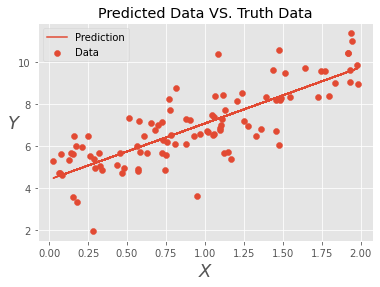

In [26]:
# Plot LR equation output (fitted line) with the original data (scatter plot of X,y)

plt.plot(X_b[:,1],f,label='Prediction')

plt.scatter(X,y,label='Data')

plt.legend()

plt.xlabel("$X$",fontsize=18)

plt.ylabel("$Y$",rotation=0,fontsize=18)

plt.title("Predicted Data VS. Truth Data")

plt.show()

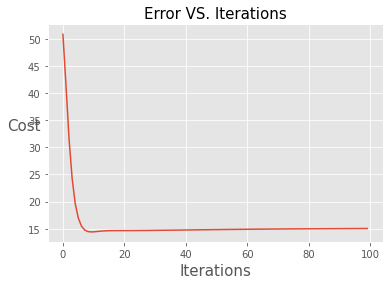

In [27]:
# draw Error Graph
plt.plot(cost)
plt.xlabel("Iterations",fontsize=15)
plt.ylabel("Cost",rotation=0,fontsize=15)
plt.title("Error VS. Iterations",fontsize=15)
plt.show()

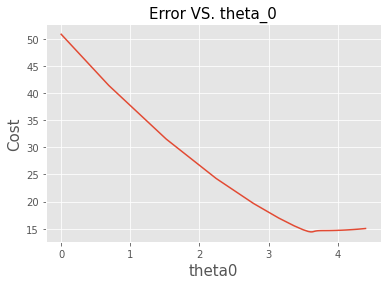

In [28]:
# draw Error and theta0 graph 
plt.plot(thetas[:,0],cost)
plt.xlabel("theta0",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_0",fontsize=15)
plt.show()

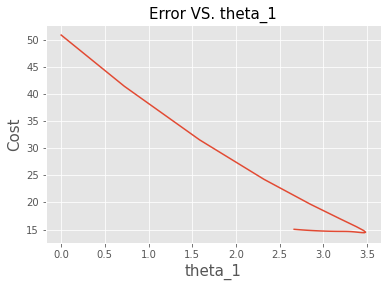

In [29]:
# draw Error and theta0 graph 
plt.plot(thetas[:,1],cost)
plt.xlabel("theta_1",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.title("Error VS. theta_1",fontsize=15)
plt.show()

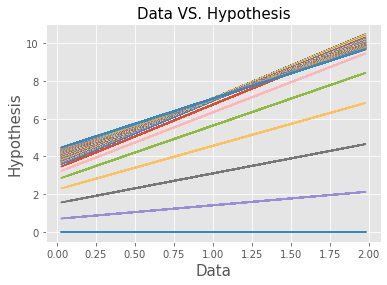

In [30]:
# draw Error and Hypothesis graph 
for i in  h:
    plt.plot(X,i)

plt.xlabel("Data",fontsize=15)
plt.ylabel("Hypothesis",fontsize=15)
plt.title("Data VS. Hypothesis",fontsize=15)
plt.show()

In [35]:
from sklearn.metrics import r2_score

r2_score(y,f)

0.7624593671817502